In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_excel('2015_brooklyn.xls', header=4)

In [9]:
pd.set_option('display.max_columns', 999)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,22,,A5,8647 15TH AVENUE,,11228,1,0,1,1547,1428,1930,1,A5,758000,2015-03-31
1,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6361,17,,A5,55 BAY 10TH STREET,,11228,1,0,1,1933,1660,1930,1,A5,778000,2015-06-15
2,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6371,60,,A9,8620 19TH AVENUE,,11214,1,0,1,2417,2106,1930,1,A9,0,2015-09-16
3,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6372,48,,S1,1906 86TH STREET,,11214,1,1,2,1900,2090,1931,1,S1,1365000,2015-05-29
4,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6373,73,,A1,50 BAY 23RD STREET,,11214,1,0,1,2417,1672,1930,1,A1,750000,2015-12-17


In [21]:
df.columns = df.columns.str.strip('\n')

In [95]:
df.columns = df.columns.str.replace("-", "_")

In [97]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'BUILDING_CLASS_AT_PRESENT',
       'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE', 'RESIDENTIAL_UNITS',
       'COMMERCIAL_UNITS', 'TOTAL_UNITS', 'LAND_SQUARE_FEET',
       'GROSS_SQUARE_FEET', 'YEAR_BUILT', 'TAX_CLASS_AT_TIME_OF_SALE',
       'BUILDING_CLASS_AT_TIME_OF_SALE', 'SALE_PRICE', 'SALE_DATE',
       'SALE_SEASON'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25362 entries, 0 to 25361
Data columns (total 21 columns):
BOROUGH                           25362 non-null int64
NEIGHBORHOOD                      25362 non-null object
BUILDING CLASS CATEGORY           25362 non-null object
TAX CLASS AT PRESENT              25362 non-null object
BLOCK                             25362 non-null int64
LOT                               25362 non-null int64
EASE-MENT                         25362 non-null object
BUILDING CLASS AT PRESENT         25362 non-null object
ADDRESS                           25362 non-null object
APARTMENT NUMBER                  25362 non-null object
ZIP CODE                          25362 non-null int64
RESIDENTIAL UNITS                 25362 non-null int64
COMMERCIAL UNITS                  25362 non-null int64
TOTAL UNITS                       25362 non-null int64
LAND SQUARE FEET                  25362 non-null int64
GROSS SQUARE FEET                 25362 non-null int64
YEAR

In [32]:
print((df['SALE PRICE'] == 0).sum())

9190


In [36]:
indexname = df[df['SALE PRICE'] == 0].index
df.drop(indexname, inplace=True)

In [39]:
df.shape

(16172, 21)

### Can't do continuous, do something like - will this house be above or below median (by zip code?)

In [40]:
df.sample(15)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
7831,3,CANARSIE,02 TWO FAMILY DWELLINGS,1,8026,22,,B2,949 E 89TH STREET,,11236,2,0,2,2300,1656,1940,1,B2,215000,2015-12-07
25099,3,WINDSOR TERRACE,07 RENTALS - WALKUP APARTMENTS,2,5277,1,,C7,1293 PROSPECT AVENUE,9,11215,9,2,11,3634,17296,1931,2,C7,5250000,2015-06-04
21248,3,PARK SLOPE,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,1096,1202,,R1,455 12TH STREET,2,11215,1,0,1,0,0,1920,2,R1,993119,2015-06-12
20432,3,OLD MILL BASIN,02 TWO FAMILY DWELLINGS,1,7878,12,,S2,1597 EAST 53RD STREET,,11234,2,1,3,2000,1920,1910,1,S2,460000,2015-08-19
25287,3,WYCKOFF HEIGHTS,07 RENTALS - WALKUP APARTMENTS,2A,3338,12,,C2,392 LINDEN STREET,,11237,6,0,6,2500,4650,1931,2,C2,910000,2015-06-24
17407,3,MADISON,02 TWO FAMILY DWELLINGS,1,7290,65,,B3,2273 CONEY ISLAND AVENUE,,11223,2,0,2,2000,1344,1930,1,B3,500000,2015-06-24
12929,3,EAST NEW YORK,13 CONDOS - ELEVATOR APARTMENTS,2,4423,1063,,R4,971 JEROME STREET,7G,11207,1,0,1,0,0,0,2,R4,225351,2015-10-28
15029,3,FLATBUSH-NORTH,07 RENTALS - WALKUP APARTMENTS,2A,4630,12,,C3,194 EAST 95 STREET,4,11212,4,0,4,2500,3195,1930,2,C3,625000,2015-10-21
821,3,BAY RIDGE,07 RENTALS - WALKUP APARTMENTS,2A,5849,56,,C2,247 SENATOR STREET,,11220,6,0,6,2030,4440,1906,2,C2,825000,2015-09-11
14554,3,FLATBUSH-LEFFERTS GARDEN,01 ONE FAMILY DWELLINGS,1,1315,73,,A4,235 STERLING STREET,,11225,1,0,1,2000,1648,1910,1,A4,1890000,2015-09-24


### Binning the sale date into seasons.

In [44]:
df['SALE SEASON'] = df['SALE DATE'].apply(lambda dt: (dt.month%12 + 3)//3)

In [45]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE SEASON
0,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,22,,A5,8647 15TH AVENUE,,11228,1,0,1,1547,1428,1930,1,A5,758000,2015-03-31,2
1,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6361,17,,A5,55 BAY 10TH STREET,,11228,1,0,1,1933,1660,1930,1,A5,778000,2015-06-15,3
3,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6372,48,,S1,1906 86TH STREET,,11214,1,1,2,1900,2090,1931,1,S1,1365000,2015-05-29,2
4,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6373,73,,A1,50 BAY 23RD STREET,,11214,1,0,1,2417,1672,1930,1,A1,750000,2015-12-17,1
5,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6374,49,,S1,1964 86TH STREET,,11214,1,1,2,1725,2112,1925,1,S1,1470000,2015-05-06,2


A lot of the data has annoying spaces in it, just doing cleaning here.

In [54]:
df['APARTMENT NUMBER'] = df[df['APARTMENT NUMBER'].unique()

array(['            ', '1C          ', '3B          ', '1A          ',
       '2A          ', '3A          ', '1B          ', '2B          ',
       '2C          ', '3C          ', 'B2          ', '1D          ',
       '2E          ', '1G          ', '1E          ', 6, 4, 25, 31,
       'B1          ', 'CB          ', '3F          ', '4G          ', 18,
       '4B          ', '3D          ', '6A          ', '5B          ',
       209, 312, 606, '4A          ', '5A          ', '4D          ', 2,
       'C           ', 1, 'A           ', 'B           ', '963B1       ',
       5, 20, 55, 8, 'A-5         ', 'D1          ', '2D          ',
       '235-2       ', '2I          ', '4I          ', '6R          ',
       '1L          ', '2L          ', '4R          ', '9B          ',
       '7A          ', 'A-3A        ', '4C          ', '5C          ',
       '5D          ', '8A          ', '5I          ', 110, 406, 413, 502,
       504, 510, 511, 708, 'P03         ', '1F          ', '7C      

In [55]:
df['APARTMENT NUMBER'] = df['APARTMENT NUMBER'].str.rstrip()

In [61]:
df['APARTMENT NUMBER'].unique()

array([None, '1C', '3B', '1A', '2A', '3A', '1B', '2B', '2C', '3C', 'B2',
       '1D', '2E', '1G', '1E', nan, 'B1', 'CB', '3F', '4G', '4B', '3D',
       '6A', '5B', '4A', '5A', '4D', 'C', 'A', 'B', '963B1', 'A-5', 'D1',
       '2D', '235-2', '2I', '4I', '6R', '1L', '2L', '4R', '9B', '7A',
       'A-3A', '4C', '5C', '5D', '8A', '5I', 'P03', '1F', '7C', '9A',
       '3R', '5P', '6B', 'D', 'E', '2R', '3L', 'C1', 'REC1', 'REC2',
       'REC3', 'REC5', 'REC4', 'S1', 'S9', 'P1', 'P2', 'P5', 'P10', 'P11',
       'P12', 'P15', 'P24', 'P4', 'P7', 'P8', 'P13', 'ST2', 'S4', 'S5',
       'S6', 'S7', 'S8', 'S10', 'S11', 'S12', 'S13', 'S16', 'S17', 'S18',
       'S19', 'S20', '3-A', '3G', 'G-1', '1R', '12C', '3E', '3J', '3I',
       '3K', '3M', '1I', 'G12', 'G15', '468-3', '7L', '10A', 'G2', '3H',
       '6D', '6E', '9E', '3D-N', '5A-N', '6D-N', '2E-S', '5E-S', '6A-S',
       '4F', '2H', 'PH1', 'PH2', 'G4', '1ST', 'B4D', 'B4F', 'C-3B',
       'C-3K', 'A1E', 'A4F', 'A-3B', '2G', 'C-2', 'B-4', '6J', 'F

In [57]:
df['APARTMENT NUMBER'] == ''

0         True
1         True
3         True
4         True
5         True
6         True
7         True
13        True
14        True
15        True
16        True
18        True
19        True
20        True
21        True
22        True
24        True
26        True
29        True
31        True
32        True
33        True
34        True
35        True
36        True
37        True
41        True
42        True
43        True
45        True
         ...  
25309    False
25310    False
25311    False
25312    False
25315     True
25317     True
25321     True
25322     True
25323     True
25324     True
25325     True
25326     True
25327     True
25328     True
25329     True
25334     True
25336     True
25337     True
25338     True
25341     True
25342     True
25343     True
25345     True
25346     True
25347     True
25349     True
25350     True
25353     True
25358    False
25361    False
Name: APARTMENT NUMBER, Length: 16172, dtype: bool

In [59]:
df.loc[df['APARTMENT NUMBER'] == '', 'APARTMENT NUMBER'] = None

In [60]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE SEASON
0,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,22,,A5,8647 15TH AVENUE,None,11228,1,0,1,1547,1428,1930,1,A5,758000,2015-03-31,2
1,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6361,17,,A5,55 BAY 10TH STREET,None,11228,1,0,1,1933,1660,1930,1,A5,778000,2015-06-15,3
3,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6372,48,,S1,1906 86TH STREET,None,11214,1,1,2,1900,2090,1931,1,S1,1365000,2015-05-29,2
4,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6373,73,,A1,50 BAY 23RD STREET,None,11214,1,0,1,2417,1672,1930,1,A1,750000,2015-12-17,1
5,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6374,49,,S1,1964 86TH STREET,None,11214,1,1,2,1725,2112,1925,1,S1,1470000,2015-05-06,2


In [63]:
df['BUILDING CLASS CATEGORY'] = df['BUILDING CLASS CATEGORY'].str.rstrip()

In [66]:
building_class = df['BUILDING CLASS CATEGORY'].unique()

In [67]:
building_class

array(['01  ONE FAMILY DWELLINGS', '02  TWO FAMILY DWELLINGS',
       '03  THREE FAMILY DWELLINGS', '04  TAX CLASS 1 CONDOS',
       '05  TAX CLASS 1 VACANT LAND', '07  RENTALS - WALKUP APARTMENTS',
       '09  COOPS - WALKUP APARTMENTS', '10  COOPS - ELEVATOR APARTMENTS',
       '12  CONDOS - WALKUP APARTMENTS', '14  RENTALS - 4-10 UNIT',
       '15  CONDOS - 2-10 UNIT RESIDENTIAL', '17  CONDO COOPS',
       '22  STORE BUILDINGS', '31  COMMERCIAL VACANT LAND',
       '32  HOSPITAL AND HEALTH FACILITIES',
       '08  RENTALS - ELEVATOR APARTMENTS',
       '13  CONDOS - ELEVATOR APARTMENTS', '21  OFFICE BUILDINGS',
       '27  FACTORIES', '29  COMMERCIAL GARAGES', '30  WAREHOUSES',
       '06  TAX CLASS 1 - OTHER',
       '16  CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT',
       '28  COMMERCIAL CONDOS', '37  RELIGIOUS FACILITIES',
       '41  TAX CLASS 4 - OTHER',
       '42  CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC', '44  CONDO PARKING',
       '47  CONDO NON-BUSINESS STORAGE',
       '36  O

In [82]:
df['EASE-MENT'].unique()
#there is no info here, dropping the column

array([' '], dtype=object)

In [84]:
df.drop(['EASE-MENT'], axis=1, inplace=True)

In [85]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE SEASON
0,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,22,A5,8647 15TH AVENUE,None,11228,1,0,1,1547,1428,1930,1,A5,758000,2015-03-31,2
1,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6361,17,A5,55 BAY 10TH STREET,None,11228,1,0,1,1933,1660,1930,1,A5,778000,2015-06-15,3
3,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6372,48,S1,1906 86TH STREET,None,11214,1,1,2,1900,2090,1931,1,S1,1365000,2015-05-29,2
4,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6373,73,A1,50 BAY 23RD STREET,None,11214,1,0,1,2417,1672,1930,1,A1,750000,2015-12-17,1
5,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6374,49,S1,1964 86TH STREET,None,11214,1,1,2,1725,2112,1925,1,S1,1470000,2015-05-06,2


In [86]:
df.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE SEASON
count,16172.0,16172.000000,16172.000000,16172.000000,16172.000000,16172.000000,16172.000000,16172.000000,16172.000000,16172.000000,16172.000000,1.617200e+04,16172.000000
mean,3.0,4218.553982,292.226503,11218.080633,2.249072,0.162441,2.425983,2066.699295,2643.442926,1794.668439,1.631029,1.236092e+06,2.516386
std,0.0,2689.857826,503.988390,153.285921,8.226182,2.913532,8.756966,6549.656830,10204.800473,513.644560,0.808761,3.935226e+06,1.101397
min,3.0,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,1.000000
25%,3.0,1671.500000,20.000000,11209.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1910.000000,1.000000,3.750000e+05,2.000000
50%,3.0,4170.000000,46.000000,11219.000000,1.000000,0.000000,1.000000,1800.000000,1500.000000,1930.000000,1.000000,6.600000e+05,3.000000
75%,3.0,6596.000000,113.000000,11231.000000,2.000000,0.000000,2.000000,2400.000000,2640.000000,1958.000000,2.000000,1.100000e+06,3.000000
max,3.0,8955.000000,7503.000000,11249.000000,338.000000,355.000000,355.000000,293000.000000,366000.000000,2016.000000,4.000000,1.690000e+08,4.000000


In [110]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'BUILDING_CLASS_AT_PRESENT',
       'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE', 'RESIDENTIAL_UNITS',
       'COMMERCIAL_UNITS', 'TOTAL_UNITS', 'LAND_SQUARE_FEET',
       'GROSS_SQUARE_FEET', 'YEAR_BUILT', 'TAX_CLASS_AT_TIME_OF_SALE',
       'BUILDING_CLASS_AT_TIME_OF_SALE', 'SALE_PRICE', 'SALE_DATE',
       'SALE_SEASON'],
      dtype='object')

In [100]:
zip_mean = df.groupby(['ZIP_CODE']).SALE_PRICE.mean().to_dict()

In [105]:
zip_mean

{0: 1141666.6666666667,
 11201: 2166831.2573609594,
 11203: 642920.5957446808,
 11204: 965283.1151515151,
 11205: 1301547.0483091788,
 11206: 2298876.388111888,
 11207: 635991.9807383628,
 11208: 586542.0232108317,
 11209: 733502.4991624791,
 11210: 952247.6058823529,
 11211: 2207692.400990099,
 11212: 1145288.3706563707,
 11213: 1282216.8566037735,
 11214: 886411.8620689656,
 11215: 1677165.8145048814,
 11216: 1241407.5951859956,
 11217: 2331664.1057142857,
 11218: 1032427.3116883116,
 11219: 954365.8284182305,
 11220: 1066720.6657381617,
 11221: 886006.6837349398,
 11222: 2093432.4166666667,
 11223: 1035132.8429561201,
 11224: 1256970.2838427948,
 11225: 1690406.3151260505,
 11226: 2036888.8384401114,
 11227: 1200000.0,
 11228: 877809.3021582734,
 11229: 648009.6793760832,
 11230: 923729.390625,
 11231: 2541694.746887967,
 11232: 2185370.471264368,
 11233: 874106.3108384458,
 11234: 578655.9590163934,
 11235: 623642.0444697833,
 11236: 511230.79595588235,
 11237: 1913577.9563106797,


In [117]:
df['zip_mean'] = [zip_mean[x] for x in df['ZIP_CODE']]

In [119]:
df.drop(['above_mean'], axis=1, inplace=True)

In [120]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE,SALE_SEASON,zip_mean
0,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,22,A5,8647 15TH AVENUE,None,11228,1,0,1,1547,1428,1930,1,A5,758000,2015-03-31,2,877809.302158
1,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6361,17,A5,55 BAY 10TH STREET,None,11228,1,0,1,1933,1660,1930,1,A5,778000,2015-06-15,3,877809.302158
3,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6372,48,S1,1906 86TH STREET,None,11214,1,1,2,1900,2090,1931,1,S1,1365000,2015-05-29,2,886411.862069
4,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6373,73,A1,50 BAY 23RD STREET,None,11214,1,0,1,2417,1672,1930,1,A1,750000,2015-12-17,1,886411.862069
5,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6374,49,S1,1964 86TH STREET,None,11214,1,1,2,1725,2112,1925,1,S1,1470000,2015-05-06,2,886411.862069


In [121]:
df.zip_mean.nunique()

40

In [123]:
df['above_mean'] = np.where(df['SALE_PRICE'] >= df['zip_mean'], 1, 0)

In [124]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE,SALE_SEASON,zip_mean,above_mean
0,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,22,A5,8647 15TH AVENUE,None,11228,1,0,1,1547,1428,1930,1,A5,758000,2015-03-31,2,877809.302158,0
1,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6361,17,A5,55 BAY 10TH STREET,None,11228,1,0,1,1933,1660,1930,1,A5,778000,2015-06-15,3,877809.302158,0
3,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6372,48,S1,1906 86TH STREET,None,11214,1,1,2,1900,2090,1931,1,S1,1365000,2015-05-29,2,886411.862069,1
4,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6373,73,A1,50 BAY 23RD STREET,None,11214,1,0,1,2417,1672,1930,1,A1,750000,2015-12-17,1,886411.862069,0
5,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6374,49,S1,1964 86TH STREET,None,11214,1,1,2,1725,2112,1925,1,S1,1470000,2015-05-06,2,886411.862069,1


In [127]:
df.above_mean.value_counts()

0    11905
1     4267
Name: above_mean, dtype: int64

In [135]:
df.describe()

,BOROUGH,BLOCK,LOT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_SEASON,zip_mean,above_mean
count,16172.0,16172.000000,16172.000000,16172.000000,16172.000000,16172.000000,16172.000000,16172.000000,16172.000000,16172.000000,16172.000000,1.617200e+04,16172.000000,1.617200e+04,16172.000000
mean,3.0,4218.553982,292.226503,11218.080633,2.249072,0.162441,2.425983,2066.699295,2643.442926,1794.668439,1.631029,1.236092e+06,2.516386,1.236092e+06,0.263851
std,0.0,2689.857826,503.988390,153.285921,8.226182,2.913532,8.756966,6549.656830,10204.800473,513.644560,0.808761,3.935226e+06,1.101397,6.357329e+05,0.440733
min,3.0,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,1.000000,2.960000e+05,0.000000
25%,3.0,1671.500000,20.000000,11209.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1910.000000,1.000000,3.750000e+05,2.000000,6.480097e+05,0.000000
50%,3.0,4170.000000,46.000000,11219.000000,1.000000,0.000000,1.000000,1800.000000,1500.000000,1930.000000,1.000000,6.600000e+05,3.000000,9.652831e+05,0.000000
75%,3.0,6596.000000,113.000000,11231.000000,2.000000,0.000000,2.000000,2400.000000,2640.000000,1958.000000,2.000000,1.100000e+06,3.000000,1.732101e+06,1.000000
max,3.0,8955.000000,7503.000000,11249.000000,338.000000,355.000000,355.000000,293000.000000,366000.000000,2016.000000,4.000000,1.690000e+08,4.000000,2.866907e+06,1.000000


In [131]:
df.to_csv("cleaned_housing_data")

In [132]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE,SALE_SEASON,zip_mean,above_mean
0,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,22,A5,8647 15TH AVENUE,None,11228,1,0,1,1547,1428,1930,1,A5,758000,2015-03-31,2,877809.302158,0
1,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6361,17,A5,55 BAY 10TH STREET,None,11228,1,0,1,1933,1660,1930,1,A5,778000,2015-06-15,3,877809.302158,0
3,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6372,48,S1,1906 86TH STREET,None,11214,1,1,2,1900,2090,1931,1,S1,1365000,2015-05-29,2,886411.862069,1
4,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6373,73,A1,50 BAY 23RD STREET,None,11214,1,0,1,2417,1672,1930,1,A1,750000,2015-12-17,1,886411.862069,0
5,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6374,49,S1,1964 86TH STREET,None,11214,1,1,2,1725,2112,1925,1,S1,1470000,2015-05-06,2,886411.862069,1


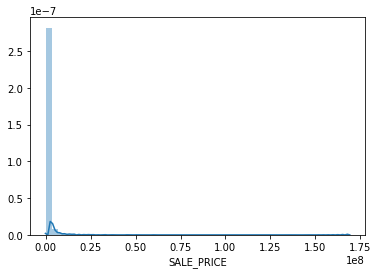

In [134]:
sns.distplot(a=df['SALE_PRICE'])

In [141]:
df.loc[df['SALE_PRICE'] < 100000]

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE,SALE_SEASON,zip_mean,above_mean
41,3,BATH BEACH,02 TWO FAMILY DWELLINGS,1,6359,29,B1,13 BAY 8TH ST,None,11228,2,0,2,2320,3160,1930,1,B1,10,2015-12-28,1,8.778093e+05,0
64,3,BATH BEACH,02 TWO FAMILY DWELLINGS,1,6393,40,S2,85 BAY 8TH STREET,None,11228,2,1,3,1933,3740,1940,1,S2,60000,2015-06-03,3,8.778093e+05,0
65,3,BATH BEACH,02 TWO FAMILY DWELLINGS,1,6393,40,S2,85 BAY 8TH STREET,None,11228,2,1,3,1933,3740,1940,1,S2,5000,2015-04-22,2,8.778093e+05,0
66,3,BATH BEACH,02 TWO FAMILY DWELLINGS,1,6393,40,S2,85 BAY 8TH,None,11228,2,1,3,1933,3740,1940,1,S2,50000,2015-04-16,2,8.778093e+05,0
115,3,BATH BEACH,02 TWO FAMILY DWELLINGS,1,6460,179,B1,293 BAY 11TH STREET,None,11228,2,0,2,2204,1928,1950,1,B1,10,2015-07-15,3,8.778093e+05,0
142,3,BATH BEACH,02 TWO FAMILY DWELLINGS,1,6466,34,B9,8858 20 AVENUE,None,11214,2,0,2,2299,1869,1945,1,B9,10,2015-03-16,2,8.864119e+05,0
199,3,BATH BEACH,04 TAX CLASS 1 CONDOS,1A,6397,1002,R3,1613 BATH AVENUE,1B,11214,1,0,1,0,0,2011,1,R3,10,2015-06-05,3,8.864119e+05,0
356,3,BAY RIDGE,01 ONE FAMILY DWELLINGS,1,5904,52,A9,48 72ND STREET,None,11209,1,0,1,1500,1500,1945,1,A9,510,2015-06-25,3,7.335025e+05,0
375,3,BAY RIDGE,01 ONE FAMILY DWELLINGS,1,5930,59,A9,471 BAY RIDGE PARKWAY,None,11209,1,0,1,2018,2096,1899,1,A9,10,2015-09-25,4,7.335025e+05,0
439,3,BAY RIDGE,01 ONE FAMILY DWELLINGS,1,6004,1,A1,8219 NARROWS AVENUE,None,11209,1,0,1,5000,2320,1925,1,A1,10,2015-03-31,2,7.335025e+05,0


In [143]:
df.drop(df.loc[df['SALE_PRICE'] <= 50000].index, inplace=True)

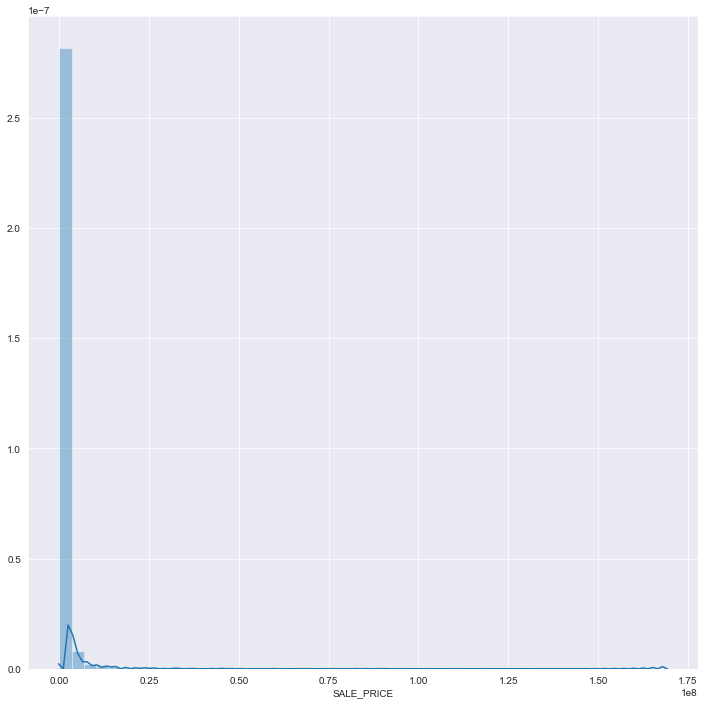

In [147]:
plt.figure(figsize=(12,12))
sns.distplot(a=df['SALE_PRICE']);

Text(0.5, 1.0, 'Year Built')

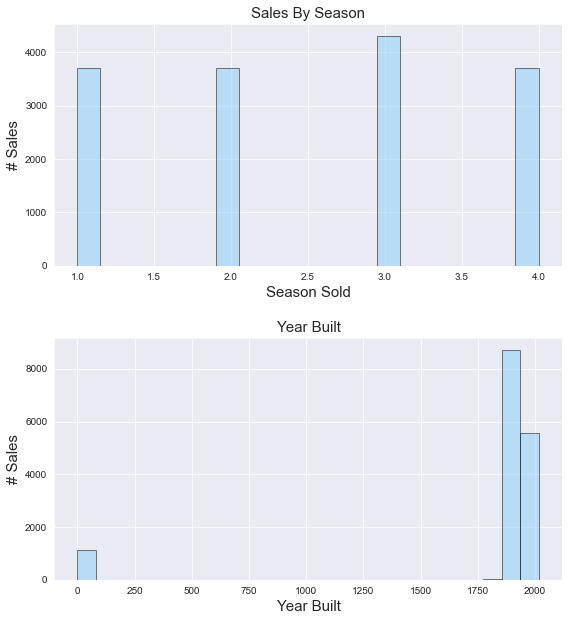

In [154]:
# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(321)
ax1.hist(df['SALE_SEASON'], bins = 20, alpha = .50,edgecolor= 'black',color ='lightskyblue')
ax1.set_xlabel('Season Sold', fontsize = 15)
ax1.set_ylabel('# Sales',fontsize = 15)
ax1.set_title('Sales By Season',fontsize = 15)

ax1 = fig.add_subplot(323)
ax1.hist(df['YEAR_BUILT'], bins=25, alpha=0.5, edgecolor= 'black',color ='lightskyblue')
ax1.set_xlabel('Year Built', fontsize = 15)
ax1.set_ylabel('# Sales',fontsize = 15)
ax1.set_title('Year Built',fontsize = 15)

In [155]:
df.loc[df['YEAR_BUILT'] < 1700]

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE,SALE_SEASON,zip_mean,above_mean
184,3,BATH BEACH,04 TAX CLASS 1 CONDOS,1A,6367,1008,R3,8659 BAY 16TH STREET,1C,11214,1,0,1,0,0,0,1,R3,520000,2015-12-15,1,8.864119e+05,0
203,3,BATH BEACH,04 TAX CLASS 1 CONDOS,1A,6402,1308,R3,8756 18TH AVENUE,1G,11214,1,0,1,0,0,0,1,R3,615000,2015-10-19,4,8.864119e+05,0
205,3,BATH BEACH,04 TAX CLASS 1 CONDOS,1A,6412,1106,R3,2106 BENSON AVENUE,3B,11214,1,0,1,0,0,0,1,R3,560000,2015-07-10,3,8.864119e+05,0
206,3,BATH BEACH,04 TAX CLASS 1 CONDOS,1A,6412,1109,R3,2108 BENSON AVENUE,3C,11214,1,0,1,0,0,0,1,R3,499500,2015-08-18,3,8.864119e+05,0
214,3,BATH BEACH,04 TAX CLASS 1 CONDOS,1A,6425,1102,R3,227 BAY 7TH STREET,2C,11228,1,0,1,0,0,0,1,R3,559000,2015-04-08,2,8.778093e+05,0
217,3,BATH BEACH,04 TAX CLASS 1 CONDOS,1A,6428,1005,R3,1546 BATH AVENUE,2B,11228,1,0,1,0,0,0,1,R3,612000,2015-01-16,1,8.778093e+05,0
222,3,BATH BEACH,04 TAX CLASS 1 CONDOS,1A,6446,1104,R3,174 BAY 29TH STREET,2B,11214,1,0,1,0,0,0,1,R3,328000,2015-07-30,3,8.864119e+05,0
223,3,BATH BEACH,04 TAX CLASS 1 CONDOS,1A,6459,1205,R3,8918 15TH AVENUE,3A,11228,1,0,1,0,0,0,1,R3,650000,2015-04-10,2,8.778093e+05,0
287,3,BATH BEACH,12 CONDOS - WALKUP APARTMENTS,2,6439,1007,R2,182 BAY 22 STREET,2C,11214,1,0,1,0,0,0,2,R2,375000,2015-06-03,3,8.864119e+05,0
308,3,BATH BEACH,31 COMMERCIAL VACANT LAND,4,6403,6,V1,8753 18TH AVENUE,None,11214,0,0,0,6047,0,0,4,V1,4600000,2015-05-29,2,8.864119e+05,1


In [156]:
df.loc[df['YEAR_BUILT'] < 1700, 'YEAR_BUILT'] = None

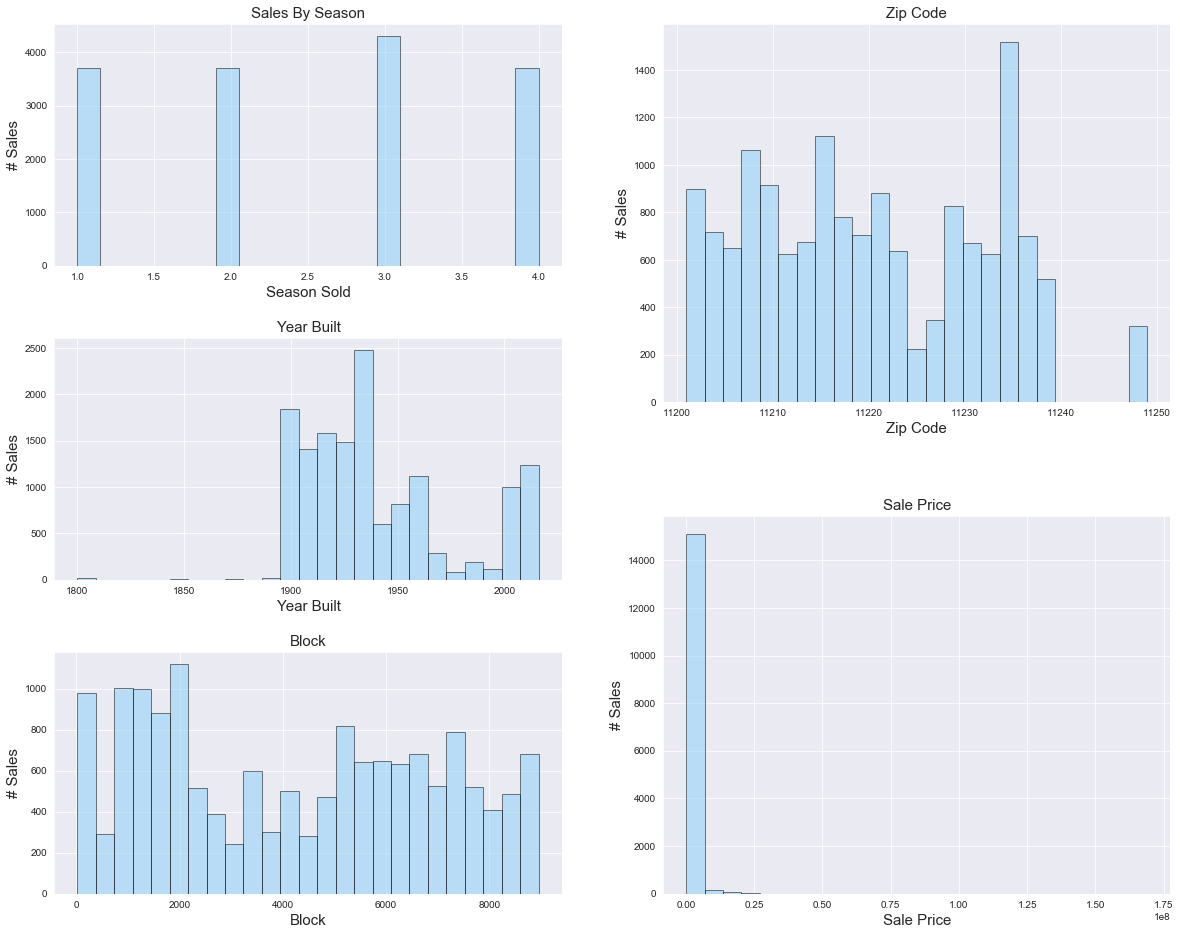

In [181]:
# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(321)
ax1.hist(df['SALE_SEASON'], bins = 20, alpha = .50,edgecolor= 'black',color ='lightskyblue')
ax1.set_xlabel('Season Sold', fontsize = 15)
ax1.set_ylabel('# Sales',fontsize = 15)
ax1.set_title('Sales By Season',fontsize = 15)

ax2 = fig.add_subplot(323)
ax2.hist(df['YEAR_BUILT'], bins=25, alpha=0.5, edgecolor= 'black',color ='lightskyblue')
ax2.set_xlabel('Year Built', fontsize = 15)
ax2.set_ylabel('# Sales',fontsize = 15)
ax2.set_title('Year Built',fontsize = 15)

ax3 = fig.add_subplot(325)
ax3.hist(df['BLOCK'], bins=25, alpha=0.5, edgecolor= 'black',color ='lightskyblue')
ax3.set_xlabel('Block', fontsize = 15)
ax3.set_ylabel('# Sales',fontsize = 15)
ax3.set_title('Block',fontsize = 15)

ax4 = fig.add_subplot(222)
ax4.hist(df['ZIP_CODE'], bins=25, alpha=0.5, edgecolor= 'black',color ='lightskyblue')
ax4.set_xlabel('Zip Code', fontsize = 15)
ax4.set_ylabel('# Sales',fontsize = 15)
ax4.set_title('Zip Code',fontsize = 15)

ax5 = fig.add_subplot(224)
ax5.hist(df['SALE_PRICE'], bins=25, alpha=0.5, edgecolor= 'black',color ='lightskyblue')
ax5.set_xlabel('Sale Price', fontsize = 15)
ax5.set_ylabel('# Sales',fontsize = 15)
ax5.set_title('Sale Price',fontsize = 15);

In [170]:
df.loc[df['ZIP_CODE']==0]

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE,SALE_SEASON,zip_mean,above_mean
13042,3,EAST NEW YORK,31 COMMERCIAL VACANT LAND,4,3880,75,V9,VAN SINDEREN AVENUE,None,0,0,0,0,6411,0,NaN,4,V9,425000,2015-12-07,1,1.141667e+06,0
18159,3,MARINE PARK,29 COMMERCIAL GARAGES,4,8590,146,G7,FLATBUSH AVENUE,None,0,0,0,0,4000,0,NaN,4,G7,1500000,2015-10-14,4,1.141667e+06,1
18163,3,MARINE PARK,31 COMMERCIAL VACANT LAND,4,8590,31,V1,AVENUE V,None,0,0,0,0,4000,0,NaN,4,V1,1500000,2015-10-14,4,1.141667e+06,1


In [172]:
df.loc[df['BLOCK'] == 8590, 'ZIP_CODE'] = 11234

In [179]:
df.loc[df['BLOCK'] == 3880]

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE,SALE_SEASON,zip_mean,above_mean


In [178]:
df.drop(df.loc[df['BLOCK'] == 3880].index, inplace=True)

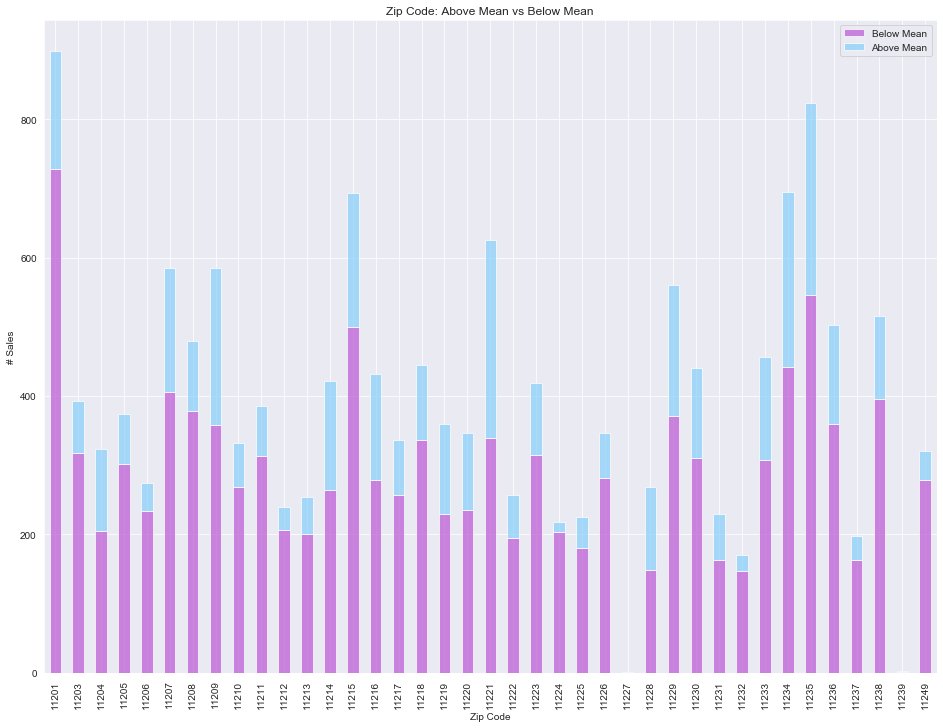

In [191]:
# zip code visualization
zipcode = df.groupby(['ZIP_CODE','above_mean']).ZIP_CODE.count().unstack()
p1 = zipcode.plot(kind = 'bar', stacked = True, 
                   title = 'Zip Code: Above Mean vs Below Mean', 
                   color = ['mediumorchid','lightskyblue'], alpha = .70, figsize=(16,12))
p1.set_xlabel('Zip Code')
p1.set_ylabel('# Sales')
p1.legend(['Below Mean','Above Mean'])
plt.show()

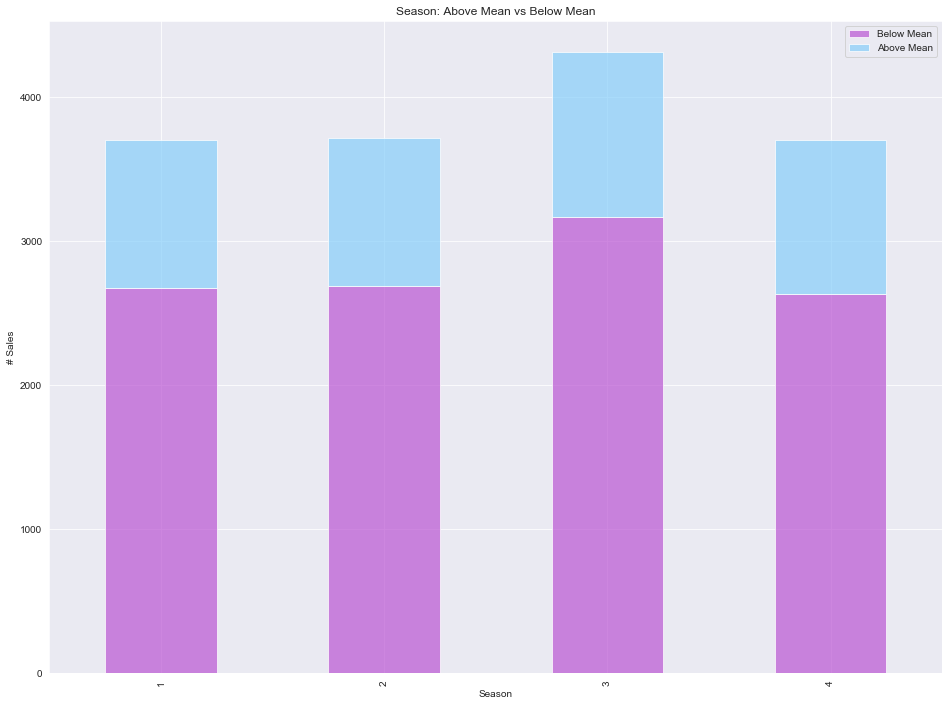

In [193]:
# season visualization
ssn = df.groupby(['SALE_SEASON','above_mean']).SALE_SEASON.count().unstack()
p1 = ssn.plot(kind = 'bar', stacked = True, 
                   title = 'Season: Above Mean vs Below Mean', 
                   color = ['mediumorchid','lightskyblue'], alpha = .70, figsize=(16,12))
p1.set_xlabel('Season')
p1.set_ylabel('# Sales')
p1.legend(['Below Mean','Above Mean'])
plt.show()

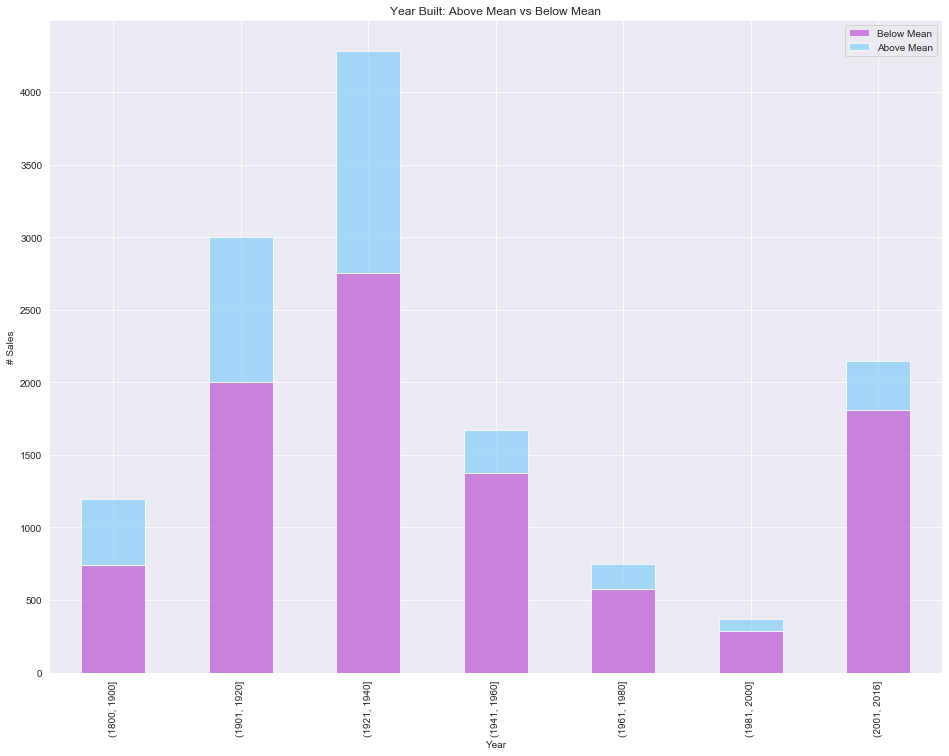

In [202]:
# year built visualization
yr = df.groupby(['year','above_mean']).year.count().unstack()
p1 = yr.plot(kind = 'bar', stacked = True, 
                   title = 'Year Built: Above Mean vs Below Mean', 
                   color = ['mediumorchid','lightskyblue'], alpha = .70, figsize=(16,12))
p1.set_xlabel('Year')
p1.set_ylabel('# Sales')
p1.legend(['Below Mean','Above Mean'])
plt.show()

In [196]:
df.YEAR_BUILT.describe()

count    14312.000000
mean      1940.974008
std         35.876170
min       1800.000000
25%       1915.000000
50%       1930.000000
75%       1960.000000
max       2016.000000
Name: YEAR_BUILT, dtype: float64

In [200]:
#want to bin the years
bins = pd.IntervalIndex.from_tuples([(1800,1900), (1901,1920), (1921, 1940), (1941, 1960), (1961, 1980), (1981, 2000), (2001, 2016)])
df['year'] = pd.cut(df['YEAR_BUILT'], bins)

In [219]:
#binning the residential units
df['apartment'] =

SyntaxError: invalid syntax (<ipython-input-219-2d66be021356>, line 2)

In [214]:
# categorize the apartments (none, ph, other)
df.APARTMENT_NUMBER.unique()

array([None, '1C', '3B', '1A', '2A', '3A', '1B', '2B', '2C', '3C', 'B2',
       '1D', '2E', '1G', '1E', nan, 'B1', 'CB', '3F', '4G', '4B', '3D',
       '6A', '5B', '4A', '5A', 'C', 'A', 'B', '963B1', 'A-5', 'D1', '4D',
       '2D', '235-2', '2I', '4I', '6R', '1L', '2L', '4R', '7A', 'A-3A',
       '4C', '5C', '5D', '5I', 'P03', '1F', '7C', '9A', '3R', '5P', '6B',
       'D', 'E', '2R', '3L', 'C1', 'REC1', 'REC2', 'REC3', 'REC5', 'REC4',
       'P2', 'ST2', '3-A', '3G', 'G-1', '1R', '12C', '3E', '3J', '3I',
       '3K', '3M', '1I', '468-3', '7L', '10A', 'G2', '3H', '6D', '6E',
       '9E', '3D-N', '5A-N', '6D-N', '2E-S', '6A-S', '4F', '2H', 'PH1',
       'PH2', 'G4', '1ST', 'B4D', 'B4F', 'C-3B', 'C-3K', 'A1E', 'A4F',
       'A-3B', '2G', 'C-2', 'B-4', '6J', '8A', 'F', '4L', '2F', 'C-A',
       'A6', 'D2', '11A', '11B', '11H', 'PH3', '4J', '1H', '5J', 'PH4',
       '8C', '9D', '8E', '10C', '4H', '6F', 'PH1A', '5H', 'PH3B', '5E',
       '5G', '6C', '7B', '7D', '7F', '8B', '8F', '9B', '9C',

In [201]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE,SALE_SEASON,zip_mean,above_mean,year
0,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,22,A5,8647 15TH AVENUE,None,11228,1,0,1,1547,1428,1930.0,1,A5,758000,2015-03-31,2,877809.302158,0,"(1921, 1940]"
1,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6361,17,A5,55 BAY 10TH STREET,None,11228,1,0,1,1933,1660,1930.0,1,A5,778000,2015-06-15,3,877809.302158,0,"(1921, 1940]"
3,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6372,48,S1,1906 86TH STREET,None,11214,1,1,2,1900,2090,1931.0,1,S1,1365000,2015-05-29,2,886411.862069,1,"(1921, 1940]"
4,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6373,73,A1,50 BAY 23RD STREET,None,11214,1,0,1,2417,1672,1930.0,1,A1,750000,2015-12-17,1,886411.862069,0,"(1921, 1940]"
5,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6374,49,S1,1964 86TH STREET,None,11214,1,1,2,1725,2112,1925.0,1,S1,1470000,2015-05-06,2,886411.862069,1,"(1921, 1940]"


In [204]:
df.drop(['BOROUGH'], axis=1, inplace=True)

In [213]:
df.RESIDENTIAL_UNITS.unique()

array([  1,   2,   3,  27,   5,   6,   4,  25,   9,  31,  18,   8,  12,
         0,  19,  20,  62,  10,  39,  58,   7,  35,  16,  32,  14,  15,
        17,  11,  47,  24, 118, 114,  13,  52,  29,  30, 104,  49,  96,
        38,  67,  41,  21,  42,  40,  54,  26, 334, 338,  34,  77, 102,
        68, 200, 133,  23,  33,  74,  43, 108,  48,  69,  22,  36,  28,
        59,  83,  84, 120,  66,  56,  95,  79,  44, 225,  89,  63, 178,
       112,  90,  61, 107, 172,  70,  81, 119,  78, 268, 126,  72, 121,
        60, 169,  53, 234])

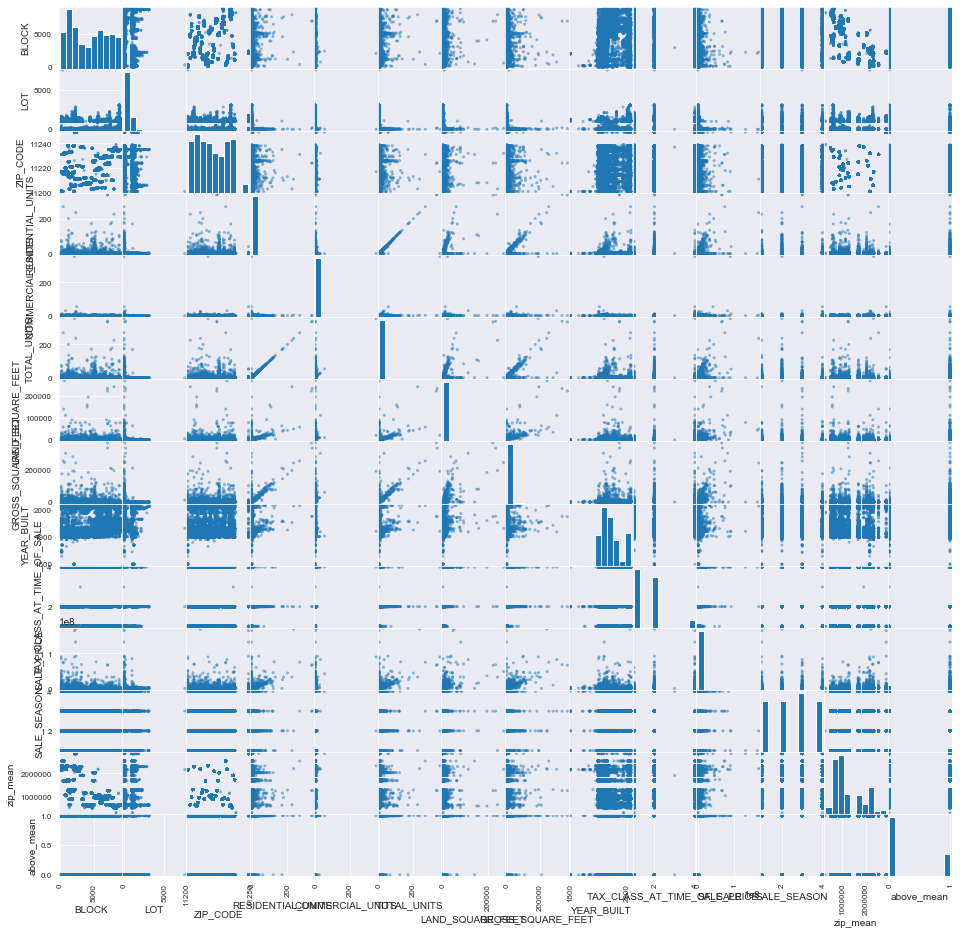

In [206]:
pd.plotting.scatter_matrix(df, figsize  = [16, 16]);
plt.show()

## Going to have a look at some PCA

In [208]:
df.columns

Index(['NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY', 'TAX_CLASS_AT_PRESENT',
       'BLOCK', 'LOT', 'BUILDING_CLASS_AT_PRESENT', 'ADDRESS',
       'APARTMENT_NUMBER', 'ZIP_CODE', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS',
       'TOTAL_UNITS', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALE_PRICE', 'SALE_DATE', 'SALE_SEASON', 'zip_mean', 'above_mean',
       'year'],
      dtype='object')

In [ ]:
outcome = ['above_mean']
predictors = ['year', 'SALE_SEASON', 'ZIP_CODE', ]